# Bayes - Mean Testing

*Pranav Shah* 

## Introduction 

## Summary

## Get Data

In [1]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

auto.price$log.price <- log(auto.price$price) # add log price

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

## Bayes Helper Functions and Prior

### Posterior

In [2]:
posterior = function(prior, like){
  post = prior * like  # Compute the product of the probabilities
  post / sum(post) # Normalize and return
}

### Likelihood

In [19]:
comp.like = function(p, x, name = 'a'){
  l = rep(0, length = length(p))
  sigmaSqr = sd(x)^2
  xBar = mean(x)
  cat(name, ' Mean =', xBar, 'Standard deviation =', sqrt(sigmaSqr), '\n')
  n = length(x)
  #    l = sapply(p, function(u) dnorm(u, mean = xBar, sd = sigmaSqr))
  l = sapply(p, function(u) exp(- n* (xBar - u)^2 / (2 * sigmaSqr)))
  l / sum(l) # Normalize and return
}

### Plot Posterior


In [15]:
plot.post = function(prior, like, post, x, name = 'test'){
  maxy = max(c(prior, like, post))
  plot(x, like, , lty = 1, ylim = c(0.0, maxy), 
       ylab = 'Density', xlab = 'Parameter value',
       main = paste(name, '- Density of prior, likelihood, posterior'),
       lwd = 2, col = 'green')
  lines(x, prior, lty = 2, lwd = 2, col = 'blue')    
  lines(x, post, lty = 1, lwd = 2, col = 'red')
  legend('topright', c('likelihood', 'prior', 'posterior'), 
         lty=1, col=c('green', 'blue', 'red'), bty='n', cex=1.0)
  
  cat(name, ':\n',
      'Maximum of prior density =', round(x[which.max(prior)], 3), '\n',
      'Maximum likelihood =', round(x[which.max(like)], 3), '\n',
      'MAP =', round(x[which.max(post)], 3))
}

### Plot Credible Interval

In [14]:
plot.ci = function(p, post, nSamps, qs, name = "test"){
  ## This function computes a credible interval using an assumption
  ## of symetry in the bulk of the distribution to keep the 
  ## calculation simple. 
  ## Compute a large sample by resampling with replacement
  samps = sample(p, size = nSamps, replace = TRUE, prob = post)
  ci = quantile(samps, probs = qs) # compute the quantiles
  
  ## Plot the density with the credible interval
  interval = qs[2] - qs[1]
  title = paste(name, ' - Posterior density with', interval, 'credible interval')
  plot(p, post, , typ = 'l', ylab = 'Density', xlab = 'Parameter value',
       main = title, lwd = 2, col = 'blue')
  abline(v = ci[1], col = 'red', lty = 2, lwd = 2)
  abline(v = ci[2], col = 'red', lty = 2, lwd = 2)
  cat('The', interval, 'Credible interval is', 
      round(ci[1], 2), 'to', round(ci[2], 2), 'for', name)
}

### Bayes Wrapper Function

In [17]:
bayes.pairs <- function(a, b, p, pp,   nSamps = 100000, qs = c(0.025, 0.975), name = c('a', 'b')){
  
  # sort log prices
  a <- sort(a, decreasing = FALSE)
  b <- sort(b, decreasing = FALSE)
  
  # calculate liklihood and posterior
  like.a = comp.like(p, a, name[1])
  post.a = posterior(pp, like.a)
  
  like.b = comp.like(p, b, name[2])
  post.b = posterior(pp, like.b)
  
  # plot ci 
  nSamps = 100000
  qs = c(0.025, 0.975)
  plot.ci(p, post.a, nSamps, qs, name[1])
  plot.ci(p, post.b, nSamps, qs, name[2])
  
  plot.post(pp, like.a, post.a, p, name[1])
  plot.post(pp, like.b, post.b, p, name[2])
  
}

### Setup Prior

In [7]:
N = 20000 
p = seq(min(auto.price$log.price), max(auto.price$log.price), length = N) 
pp = dnorm(p, mean = mean(auto.price$log.price), sd = sd(auto.price$log.price)) ## start with a fairly broad prior
pp = pp / sum(pp)

## Aspiration - Standard v. Turbo


Turbo  Mean = 9.625932 Standard deviation = 0.3832251 
Standard  Mean = 9.287064 Standard deviation = 0.5140133 
The 0.95 Credible interval is 9.5 to 9.74 for Turbo

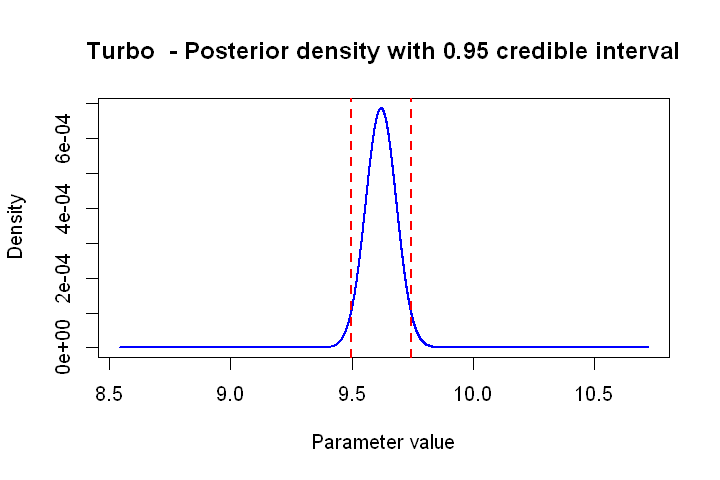

The 0.95 Credible interval is 9.21 to 9.37 for Standard

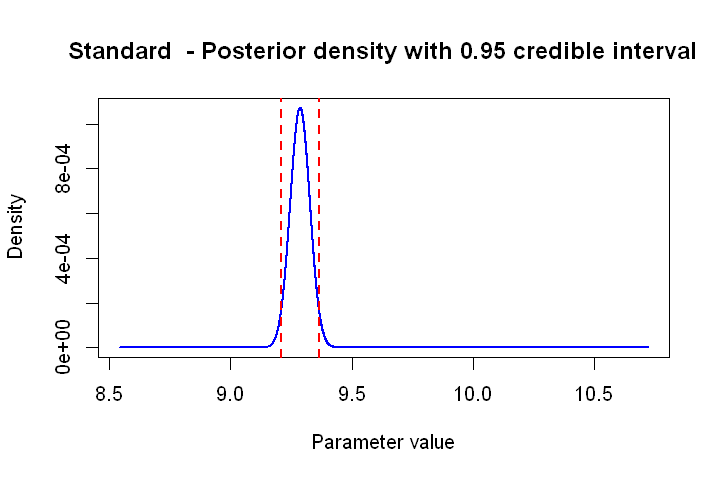

Turbo :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.626 
 MAP = 9.622

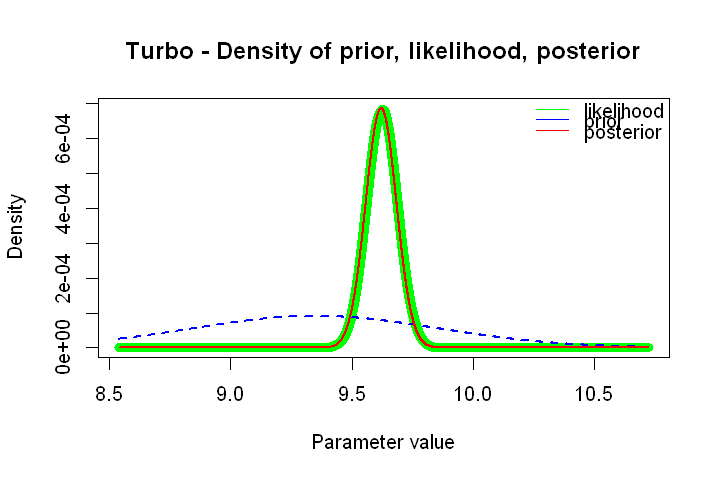

Standard :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.287 
 MAP = 9.287

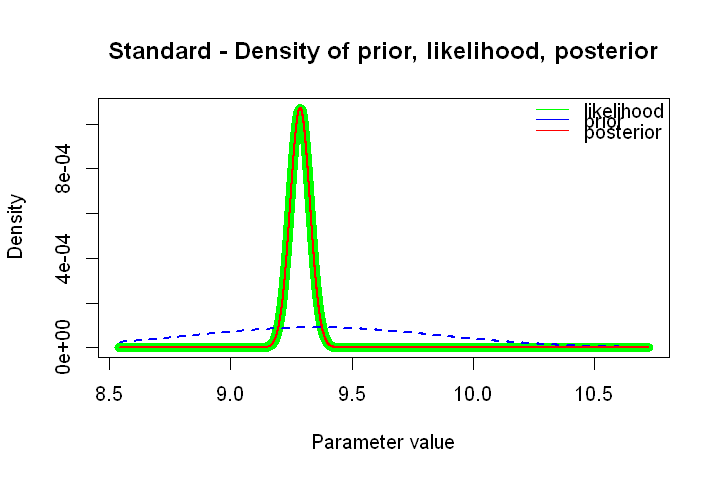

In [20]:
require(dplyr)
auto.turbo <- filter(auto.price, aspiration == "turbo")
auto.standard <- filter(auto.price, aspiration == "std")

require(repr)
options(repr.plot.width=6, repr.plot.height=4)

bayes.pairs(auto.turbo$log.price, auto.standard$log.price, p = p, pp = pp, name = c('Turbo', 'Standard'))

## Fuel Type - Gas v. Diesel


Gas  Mean = 9.325876 Standard deviation = 0.5072395 
Diesel  Mean = 9.55742 Standard deviation = 0.4880124 
The 0.95 Credible interval is 9.25 to 9.4 for Gas

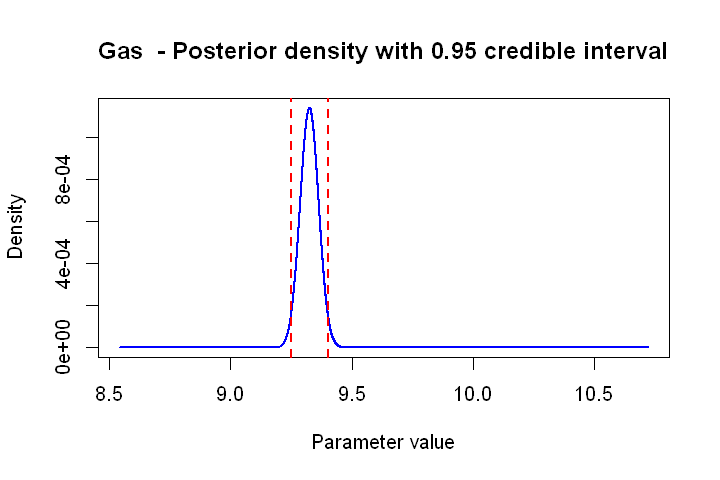

The 0.95 Credible interval is 9.34 to 9.76 for Diesel

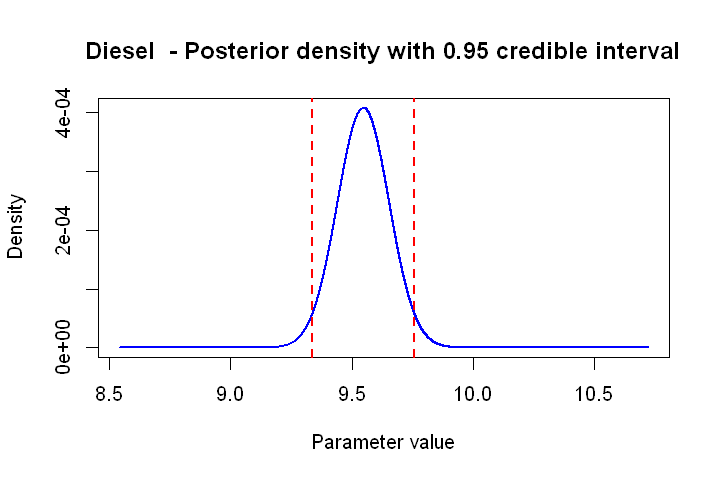

Gas :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.326 
 MAP = 9.326

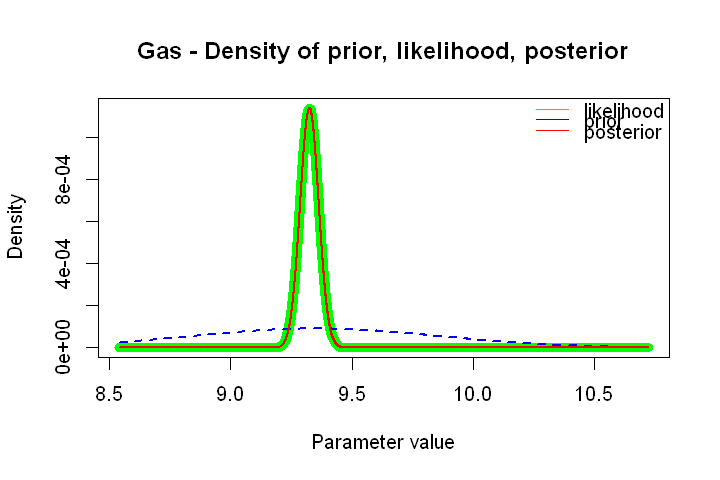

Diesel :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.557 
 MAP = 9.548

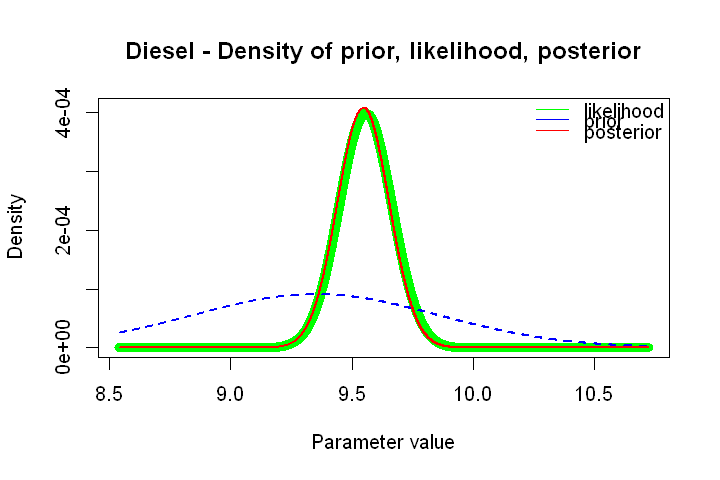

In [21]:
auto.gas <- filter(auto.price, fuel.type == "gas")
auto.diesel <- filter(auto.price, fuel.type == "diesel")

bayes.pairs(auto.gas$log.price, auto.diesel$log.price, p =p, pp = pp, name = c('Gas', "Diesel"))

## Body Style

In [11]:
auto.conv <- filter(auto.price, body.style == "convertible")
auto.hardtop <- filter(auto.price, body.style == "hardtop")
auto.hatchback <- filter(auto.price, body.style == "hatchback")
auto.sedan <- filter(auto.price, body.style == "sedan")
auto.wagon <- filter(auto.price, body.style == "wagon")

### Convertible - Hardtop

Conv.  Mean = 9.890536 Standard deviation = 0.4894231 
Hardtop  Mean = 9.793886 Standard deviation = 0.7179666 
The 0.95 Credible interval is 9.45 to 10.18 for Conv.

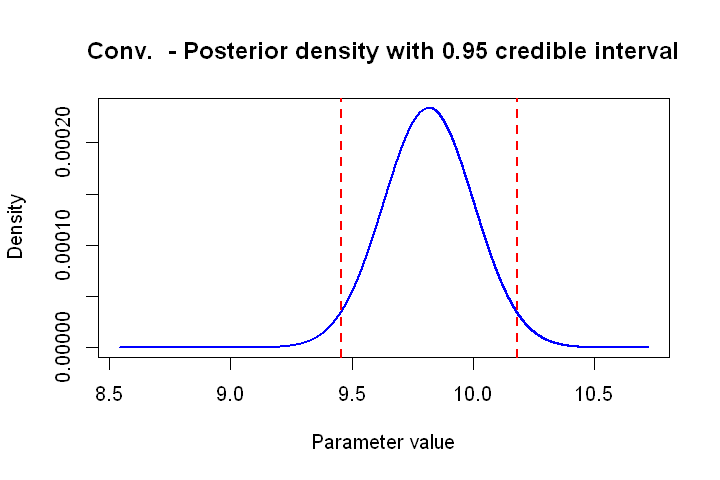

The 0.95 Credible interval is 9.26 to 10.15 for Hardtop

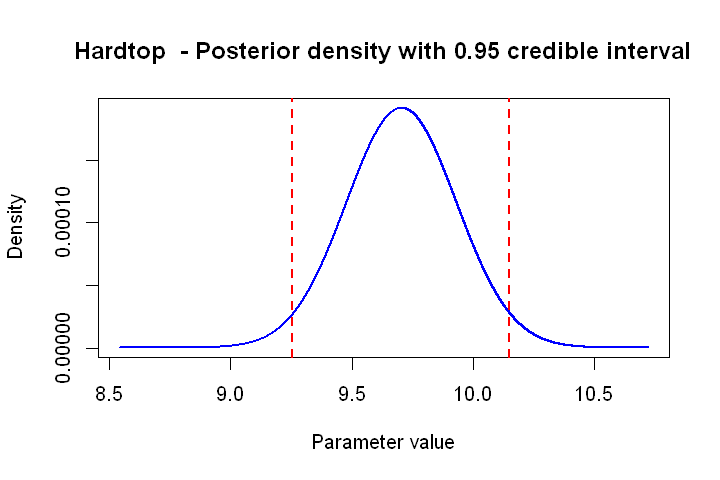

Conv. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.891 
 MAP = 9.818

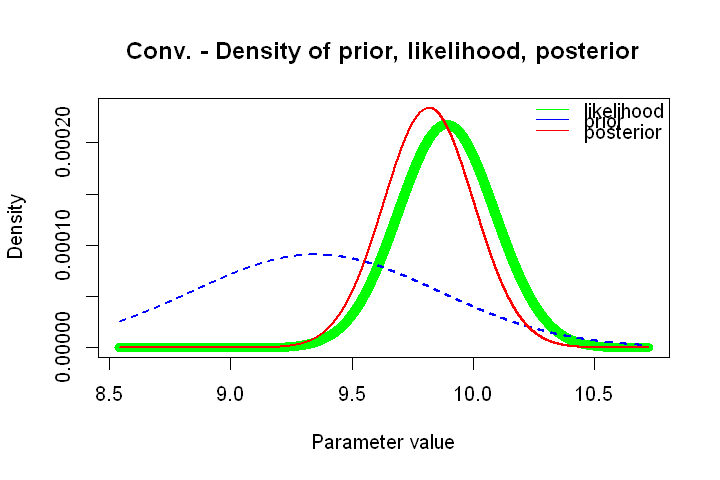

Hardtop :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.794 
 MAP = 9.705

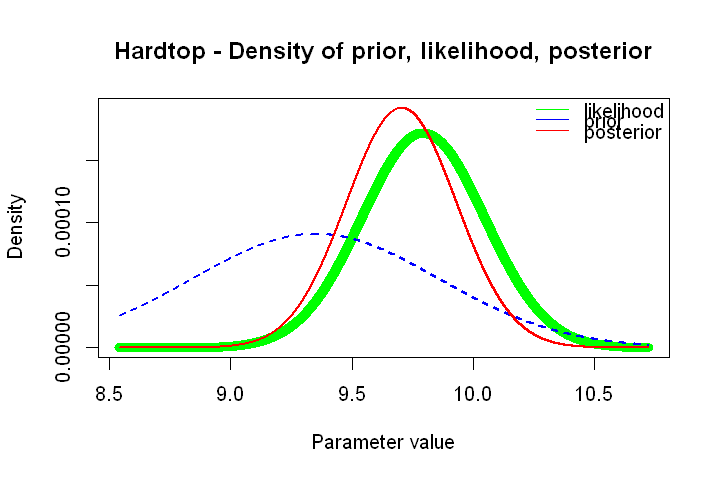

In [23]:
# conv - hardtop
bayes.pairs(auto.conv$log.price, auto.hardtop$log.price, p =p, pp = pp, name = c('Conv.', 'Hardtop'))

### Convertible - Hatchback

Conv.  Mean = 9.890536 Standard deviation = 0.4894231 
Hatch.  Mean = 9.105165 Standard deviation = 0.3963946 
The 0.95 Credible interval is 9.46 to 10.18 for Conv.

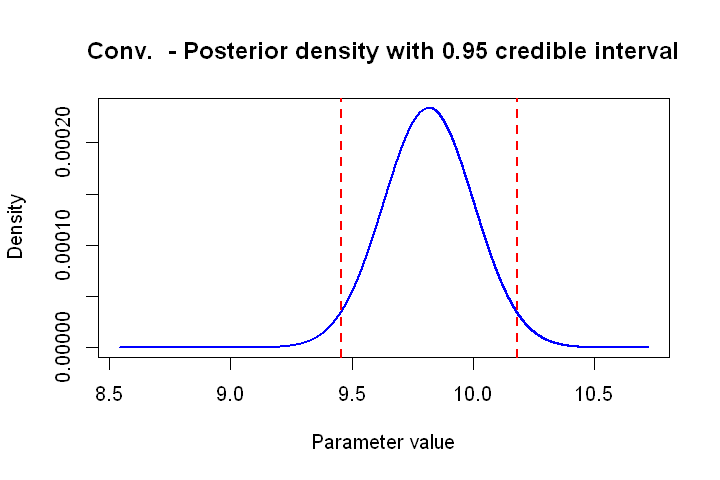

The 0.95 Credible interval is 9.01 to 9.21 for Hatch.

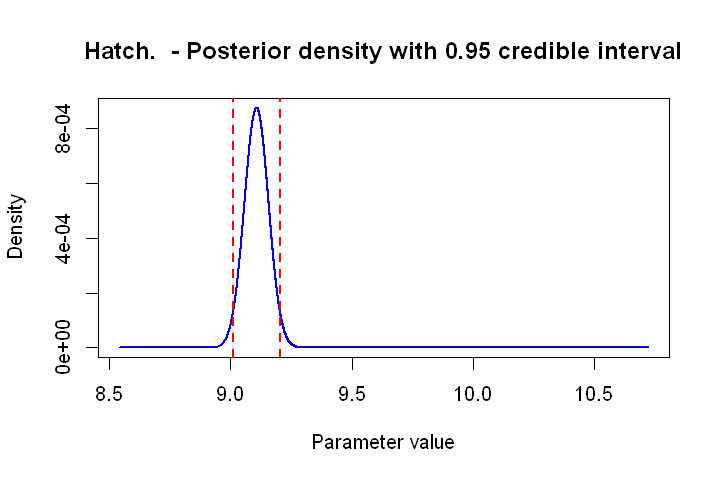

Conv. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.891 
 MAP = 9.818

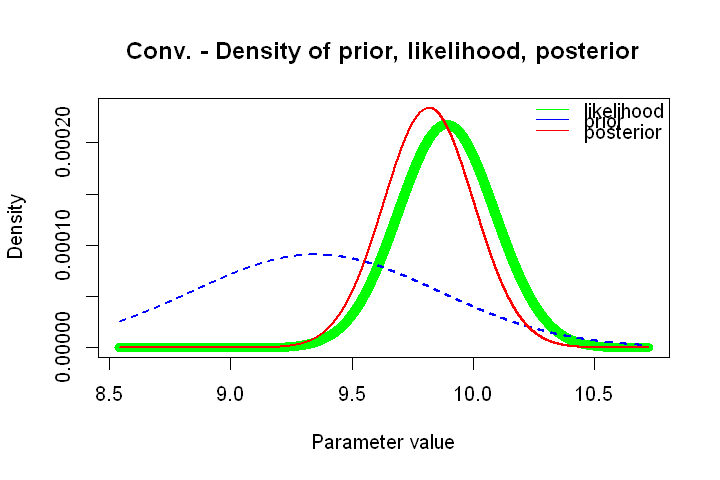

Hatch. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.105 
 MAP = 9.108

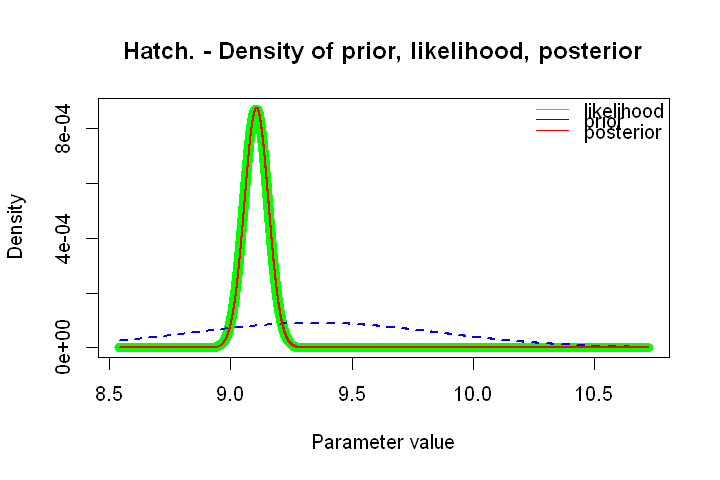

In [24]:
# conv - hatchback
bayes.pairs(auto.conv$log.price, auto.hatchback$log.price, p =p, pp = pp, name = c('Conv.', 'Hatch.'))

Conv.  Mean = 9.890536 Standard deviation = 0.4894231 
Sedan  Mean = 9.438602 Standard deviation = 0.5126516 
The 0.95 Credible interval is 9.45 to 10.18 for Conv.

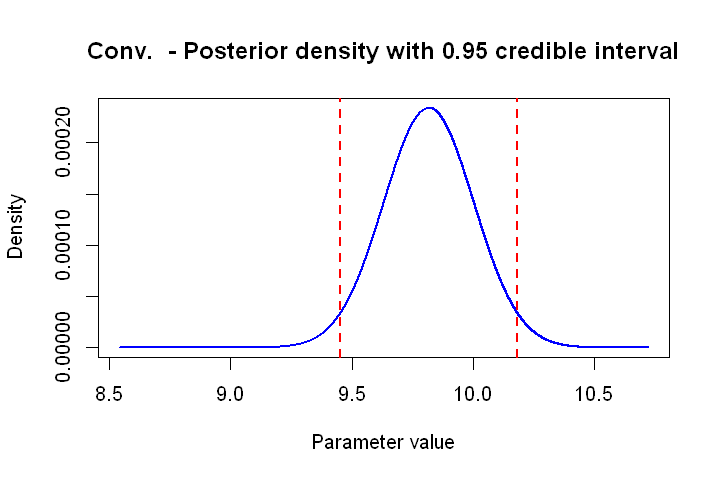

The 0.95 Credible interval is 9.33 to 9.54 for Sedan

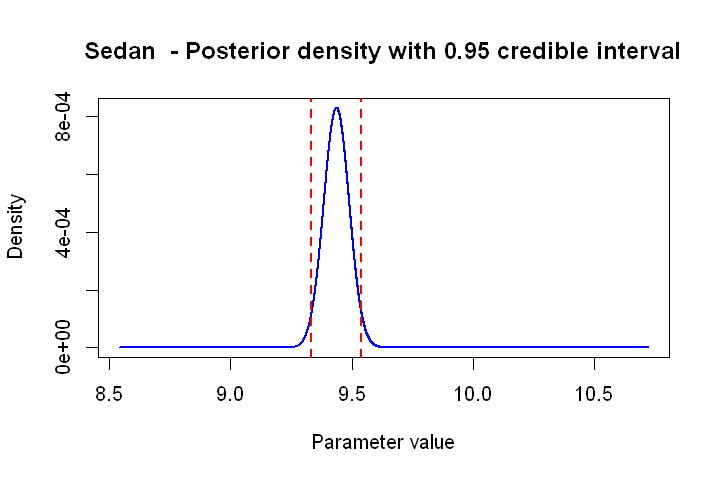

Conv. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.891 
 MAP = 9.818

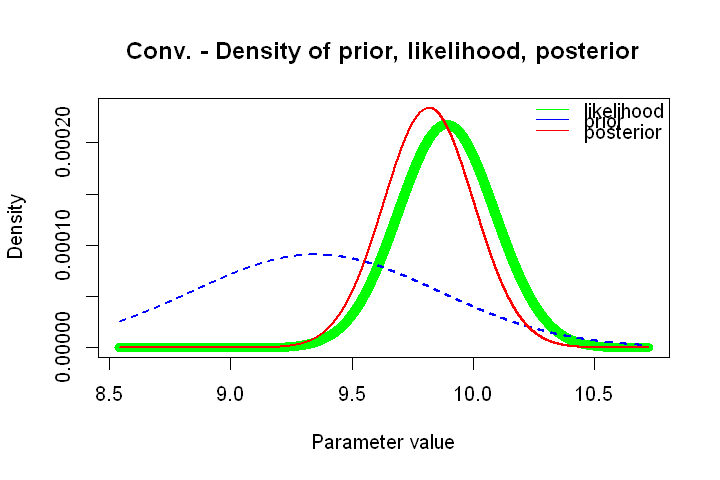

Sedan :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.439 
 MAP = 9.438

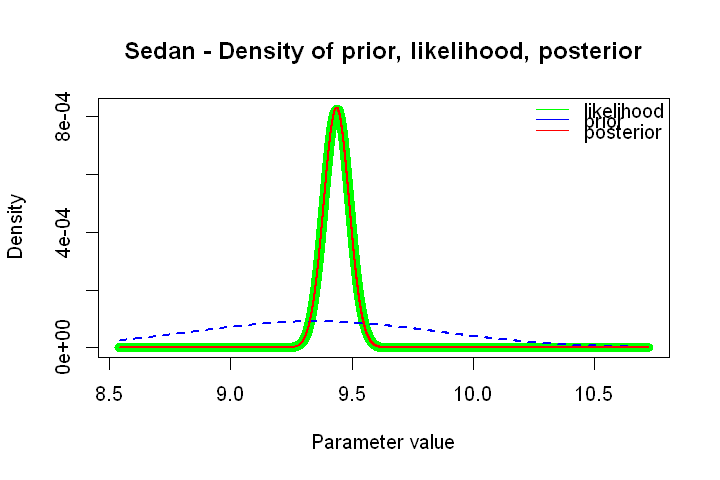

In [25]:
# conv - sedan
bayes.pairs(auto.conv$log.price, auto.sedan$log.price, p =p, pp = pp, name = c('Conv.', 'Sedan'))

Conv.  Mean = 9.890536 Standard deviation = 0.4894231 
Wagon  Mean = 9.359517 Standard deviation = 0.3856481 
The 0.95 Credible interval is 9.45 to 10.18 for Conv.

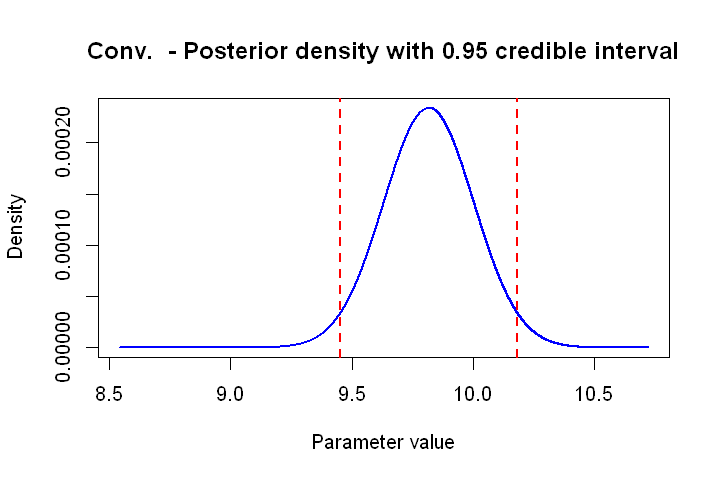

The 0.95 Credible interval is 9.21 to 9.51 for Wagon

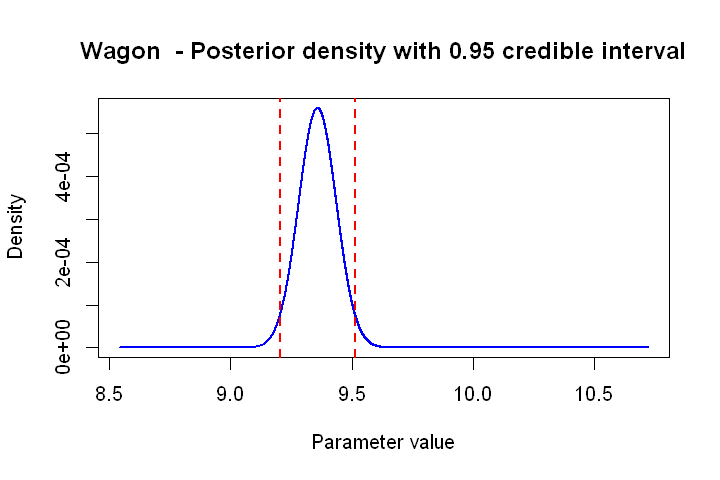

Conv. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.891 
 MAP = 9.818

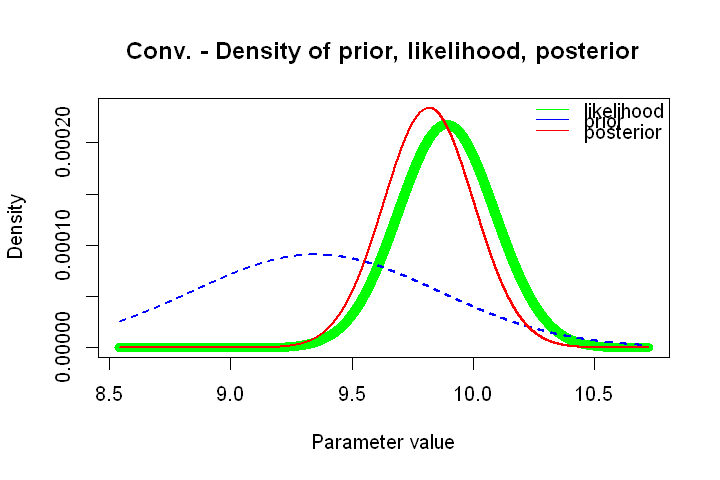

Wagon :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.36 
 MAP = 9.359

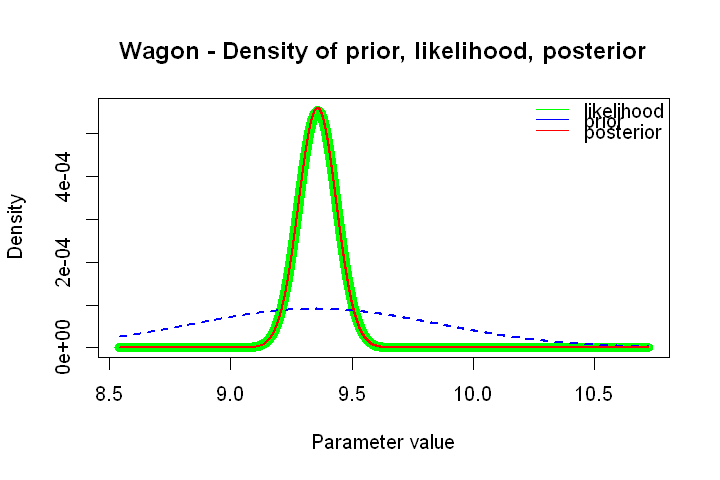

In [26]:
# conv - wagon
bayes.pairs(auto.conv$log.price, auto.wagon$log.price, p =p, pp = pp, name = c('Conv.', 'Wagon'))

Hardtop  Mean = 9.793886 Standard deviation = 0.7179666 
Hatch.  Mean = 9.105165 Standard deviation = 0.3963946 
The 0.95 Credible interval is 9.26 to 10.15 for Hardtop

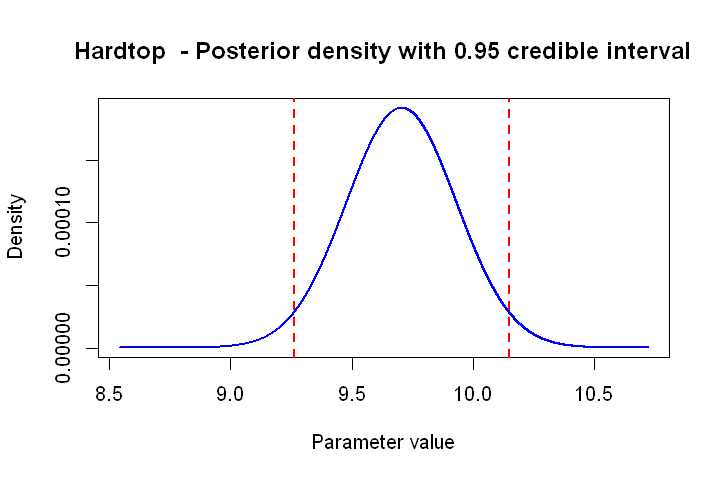

The 0.95 Credible interval is 9.01 to 9.21 for Hatch.

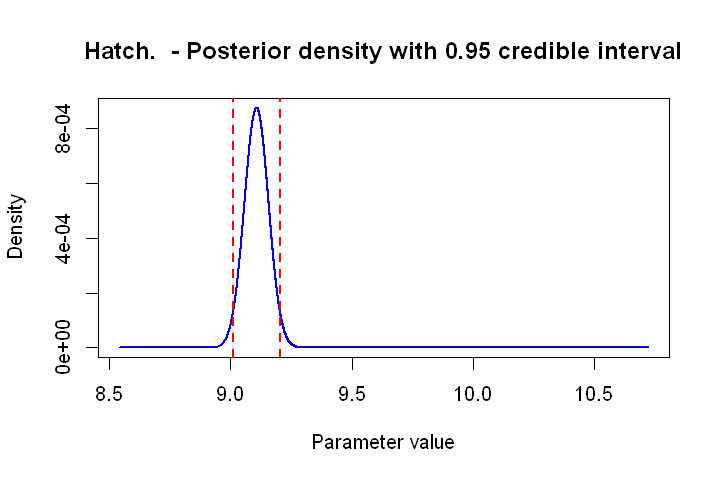

Hardtop :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.794 
 MAP = 9.705

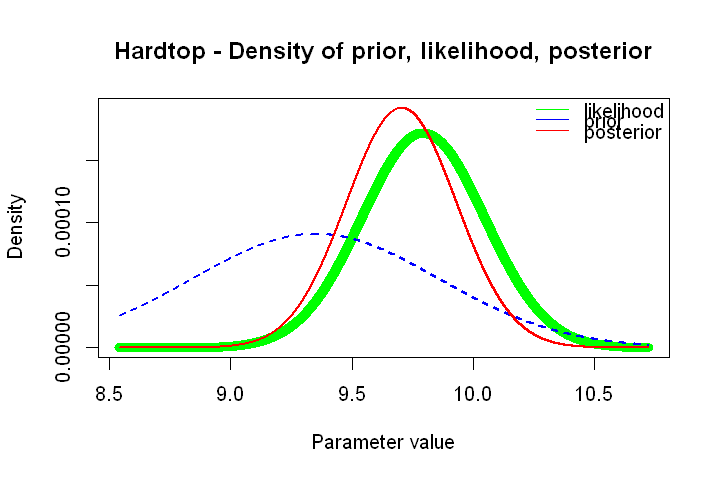

Hatch. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.105 
 MAP = 9.108

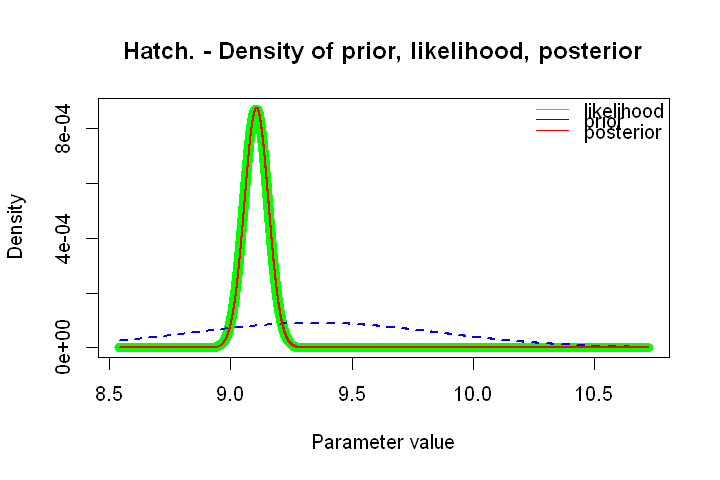

In [27]:
# hardtop - hatchback
bayes.pairs(auto.hardtop$log.price, auto.hatchback$log.price, p =p, pp = pp, name = c('Hardtop', 'Hatch.')) 

Hardtop  Mean = 9.793886 Standard deviation = 0.7179666 
Sedan  Mean = 9.438602 Standard deviation = 0.5126516 
The 0.95 Credible interval is 9.26 to 10.15 for Hardtop

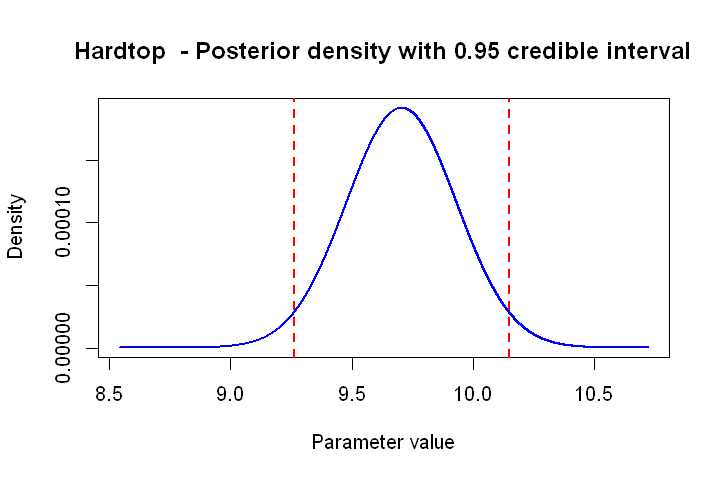

The 0.95 Credible interval is 9.33 to 9.54 for Sedan

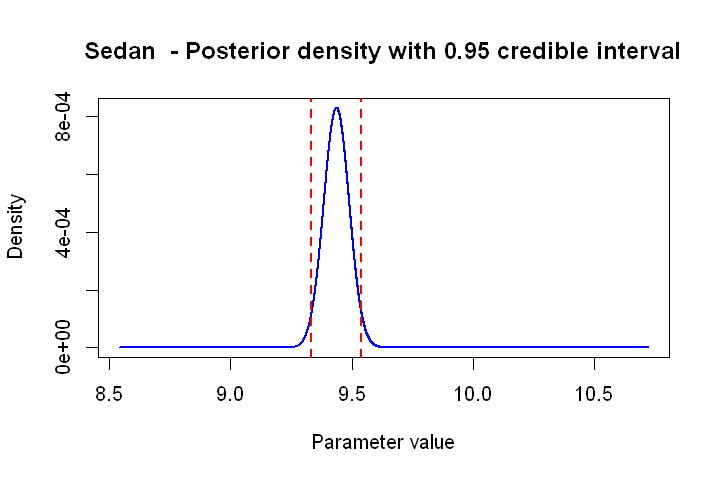

Hardtop :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.794 
 MAP = 9.705

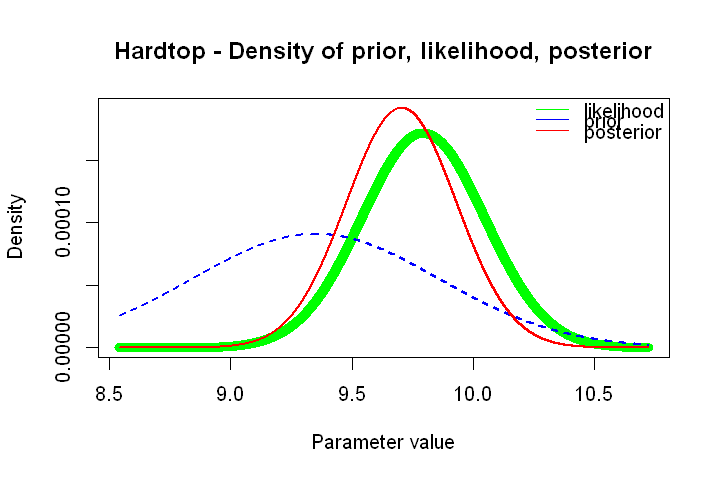

Sedan :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.439 
 MAP = 9.438

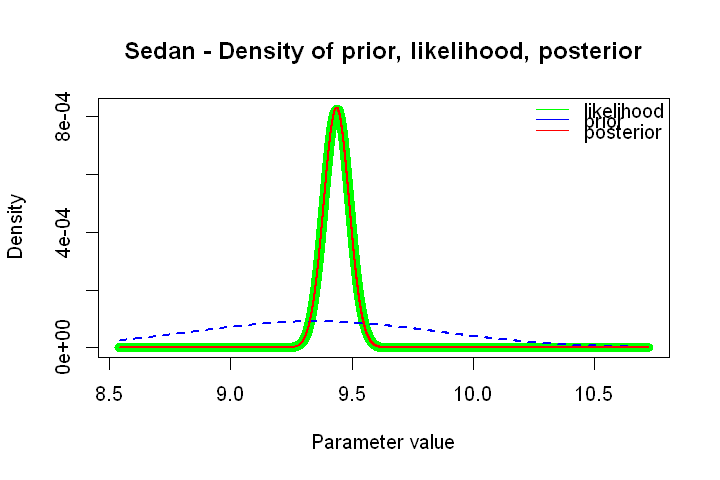

In [28]:
# hardtop - sedan
bayes.pairs(auto.hardtop$log.price, auto.sedan$log.price, p =p, pp = pp,  name = c('Hardtop', 'Sedan'))

Hardtop  Mean = 9.793886 Standard deviation = 0.7179666 
Wagon  Mean = 9.359517 Standard deviation = 0.3856481 
The 0.95 Credible interval is 9.26 to 10.15 for Hardtop

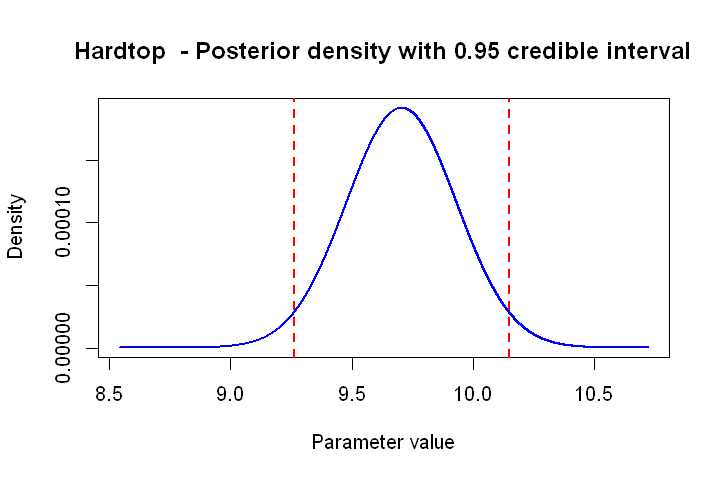

The 0.95 Credible interval is 9.21 to 9.51 for Wagon

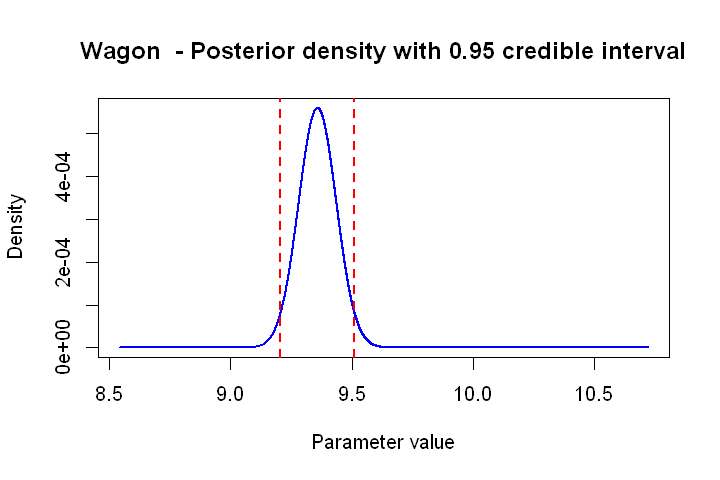

Hardtop :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.794 
 MAP = 9.705

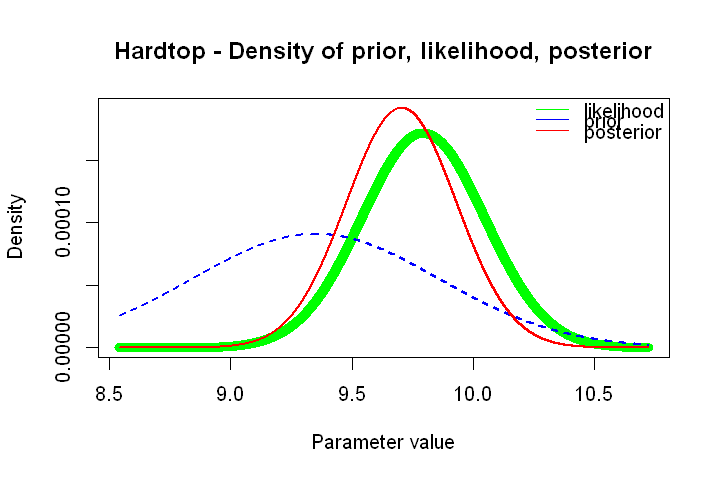

Wagon :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.36 
 MAP = 9.359

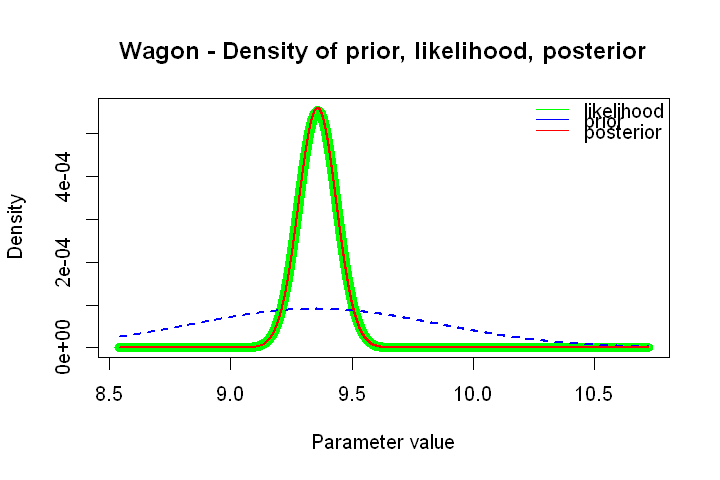

In [29]:
# hardtop - wagon
bayes.pairs(auto.hardtop$log.price, auto.wagon$log.price, p =p, pp = pp, name = c('Hardtop', 'Wagon'))

Hatch.  Mean = 9.105165 Standard deviation = 0.3963946 
Wagon  Mean = 9.359517 Standard deviation = 0.3856481 
The 0.95 Credible interval is 9.01 to 9.2 for Hatch.

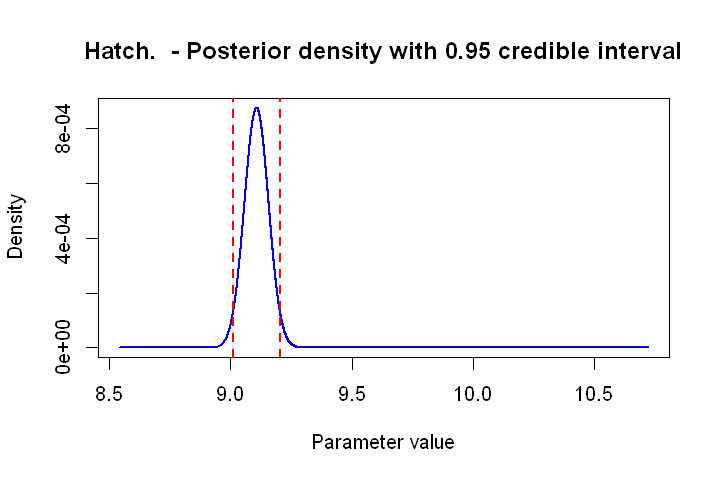

The 0.95 Credible interval is 9.21 to 9.51 for Wagon

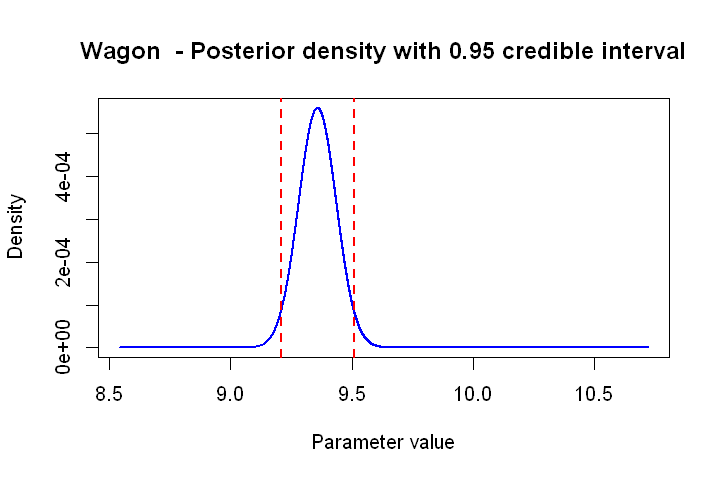

Hatch. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.105 
 MAP = 9.108

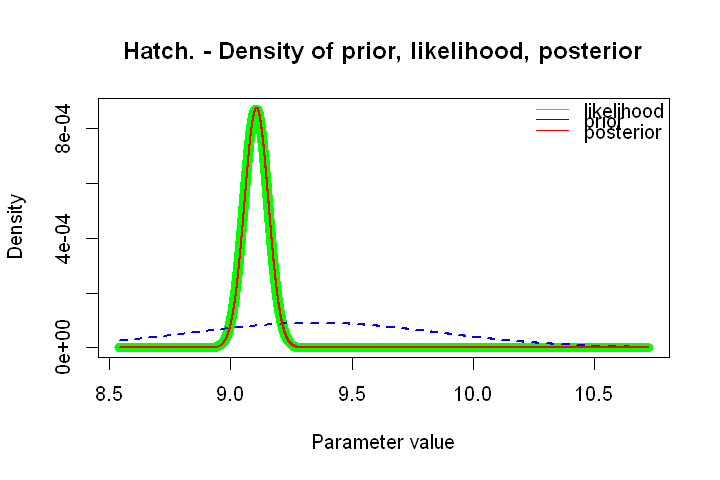

Wagon :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.36 
 MAP = 9.359

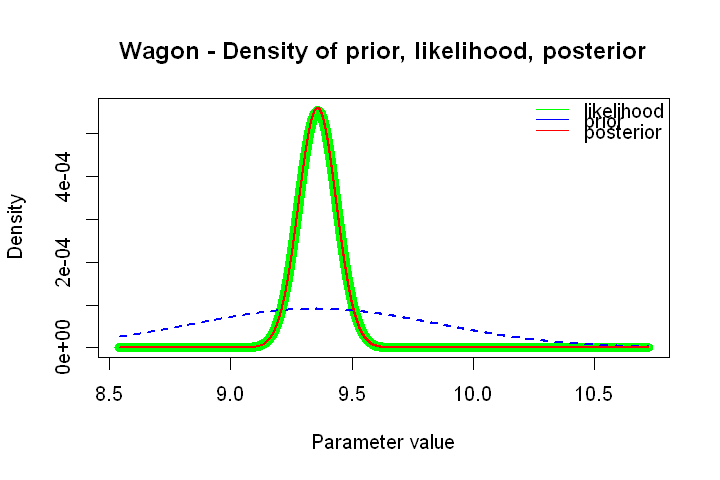

In [31]:
# hatchback - wagon
bayes.pairs(auto.hatchback$log.price, auto.wagon$log.price, p =p, pp = pp, name = c('Hatch.', 'Wagon'))

Hatch.  Mean = 9.105165 Standard deviation = 0.3963946 
Sedan  Mean = 9.438602 Standard deviation = 0.5126516 
The 0.95 Credible interval is 9.01 to 9.2 for Hatch.

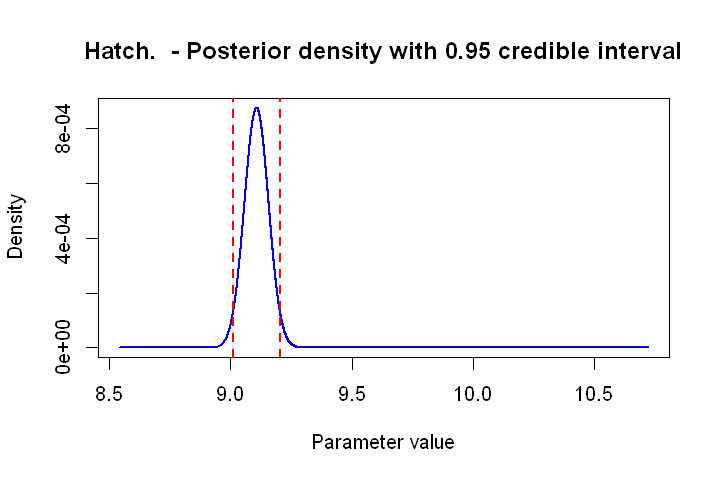

The 0.95 Credible interval is 9.33 to 9.54 for Sedan

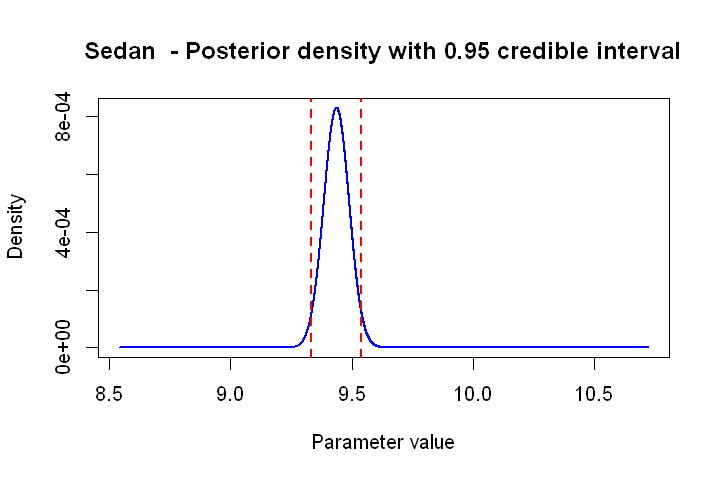

Hatch. :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.105 
 MAP = 9.108

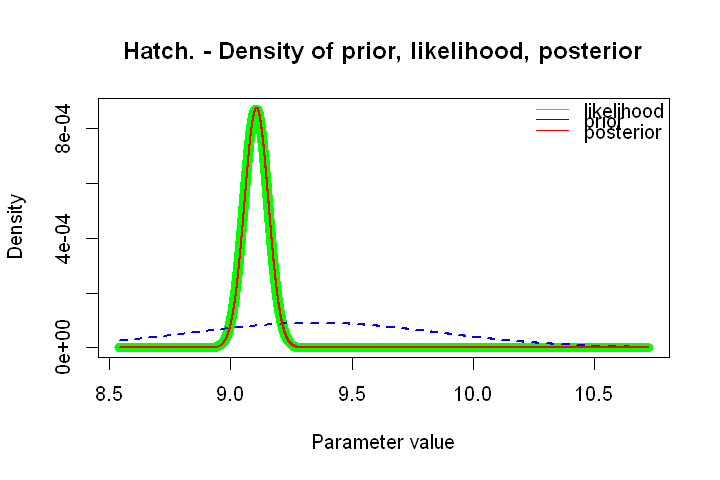

Sedan :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.439 
 MAP = 9.438

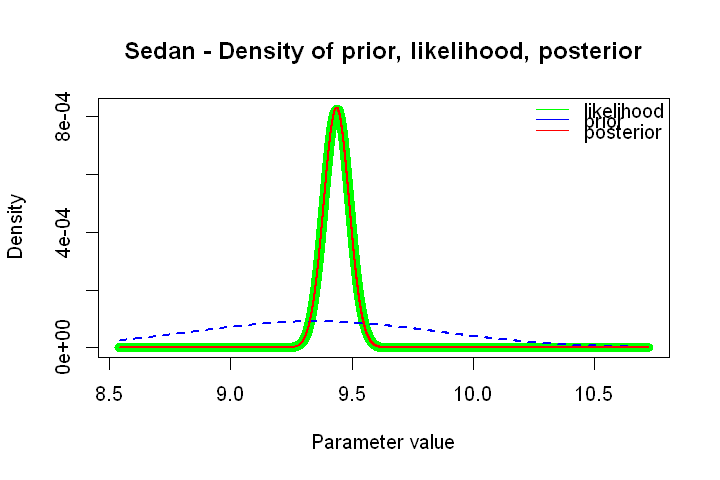

In [30]:
# hatchback - sedan
bayes.pairs(auto.hatchback$log.price, auto.sedan$log.price, p =p, pp = pp, name = c('Hatch.', 'Sedan'))

Wagon  Mean = 9.359517 Standard deviation = 0.3856481 
Sedan  Mean = 9.438602 Standard deviation = 0.5126516 
The 0.95 Credible interval is 9.21 to 9.51 for Wagon

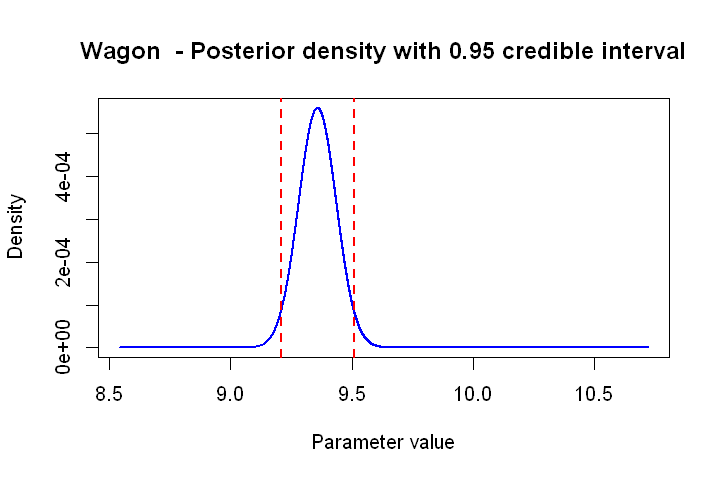

The 0.95 Credible interval is 9.33 to 9.54 for Sedan

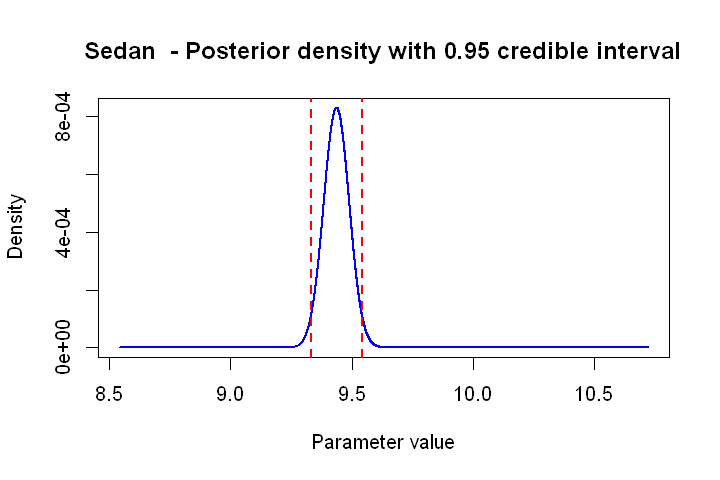

Wagon :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.36 
 MAP = 9.359

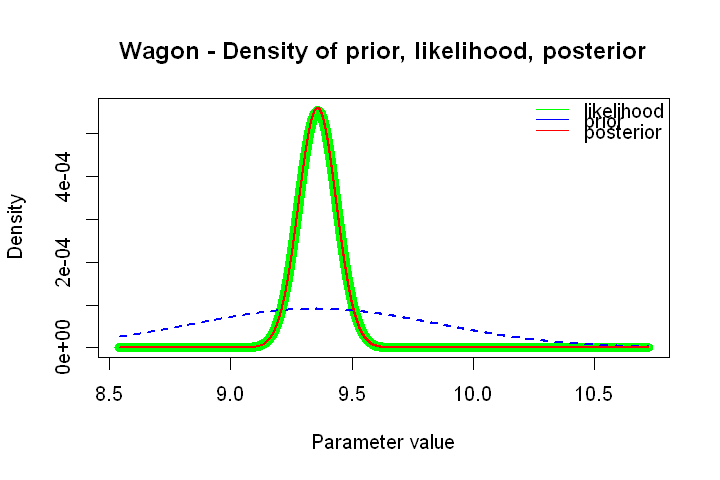

Sedan :
 Maximum of prior density = 9.35 
 Maximum likelihood = 9.439 
 MAP = 9.438

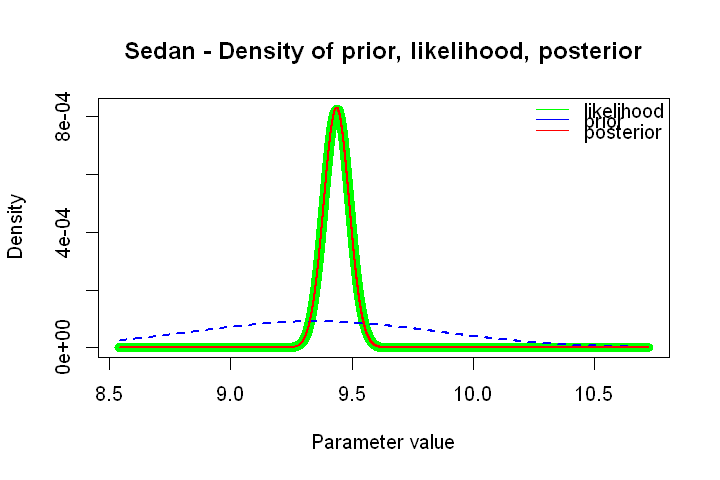

In [32]:
# wagon - sedan
bayes.pairs(auto.wagon$log.price, auto.sedan$log.price, p =p, pp = pp, name = c('Wagon', 'Sedan'))